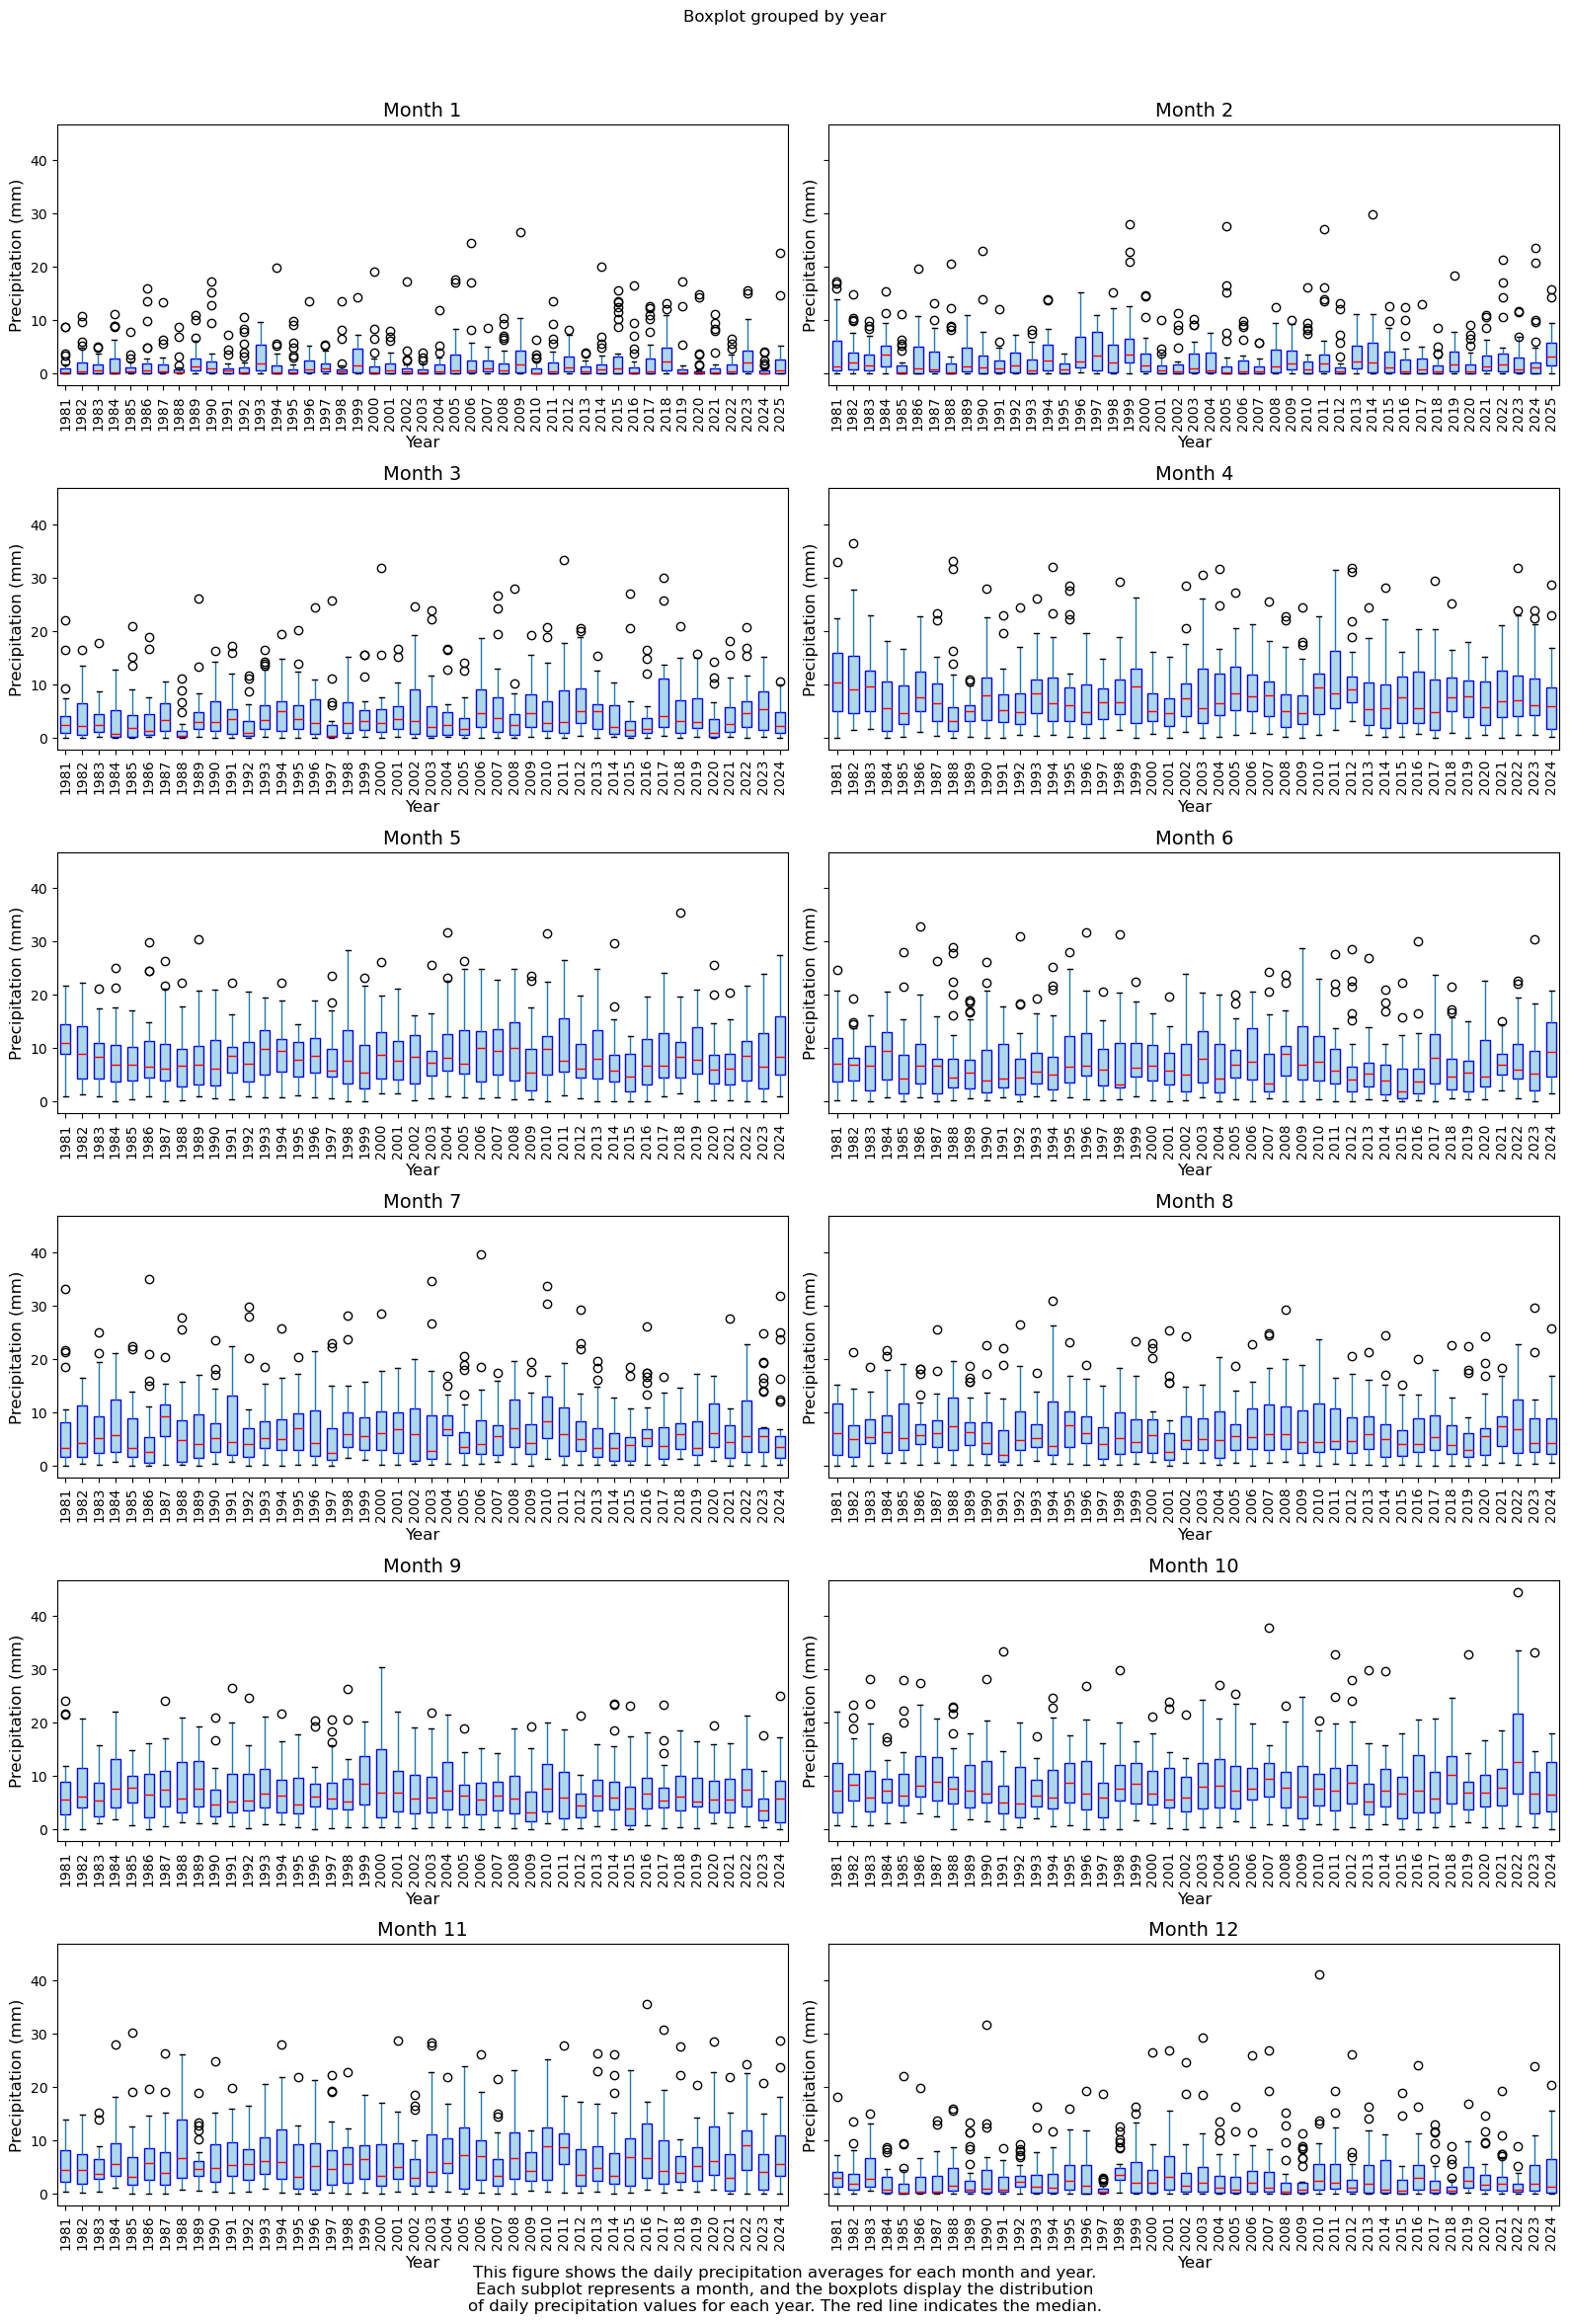

In [7]:
import xarray as xr
import pandas as pd
import os
import matplotlib.pyplot as plt

# Ruta del archivo NetCDF
file_path = "/Users/riperez/Conda/anaconda3/doc/precipitation/output/boyaca_region_daily.nc"

# Verificar si el archivo existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file does not exist at the specified path: {file_path}")

# Cargar el dataset
ds = xr.open_dataset(file_path)

# Asegurarse de que el dataset contiene la variable de precipitación
if 'precip' not in ds.variables:
    raise ValueError("The dataset does not contain the variable 'precip'.")

# Convertir a un DataFrame para facilitar el análisis
df = ds['precip'].to_dataframe().reset_index()

# Asegurarse de que la columna de tiempo está en formato datetime
df['time'] = pd.to_datetime(df['time'])

# Agregar columnas para año, mes y día
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

# Calcular el promedio diario para cada mes de cada año
daily_avg = df.groupby(['year', 'month', 'day'])['precip'].mean().reset_index()

# Crear un gráfico con subplots para cada mes
fig, axes = plt.subplots(6, 2, figsize=(16, 24), sharey=True)
fig.suptitle('Daily Precipitation Average by Month and Year', fontsize=20)

# Iterar sobre cada mes y generar un subplot
for month in range(1, 13):
    ax = axes[(month - 1) // 2, (month - 1) % 2]
    monthly_data = daily_avg[daily_avg['month'] == month]
    
    # Crear boxplot para el mes actual
    monthly_data.boxplot(
        column='precip',
        by='year',
        ax=ax,
        grid=False,
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue', color='blue'),
        medianprops=dict(color='red')
    )
    
    ax.set_title(f'Month {month}', fontsize=14)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Precipitation (mm)', fontsize=12)
    ax.tick_params(axis='x', labelrotation=90)  # Rotar los años en el eje x

# Agregar descripción del procedimiento en inglés
description = (
    "This figure shows the daily precipitation averages for each month and year.\n"
    "Each subplot represents a month, and the boxplots display the distribution\n"
    "of daily precipitation values for each year. The red line indicates the median."
)
plt.figtext(0.5, 0.01, description, wrap=True, horizontalalignment='center', fontsize=12)

# Ajustar diseño
plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.show()